IMPORTING LIBRARIES

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [ ]:
!pip install --upgrade scikit-learn

Reading data

In [ ]:
file_path = "/home/indira/Projects/Datasci/EDA/Fuel consumption/data/FuelConsumption.csv"
df = pd.read_csv(file_path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Selecting Features

In [ ]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


Plotting Features

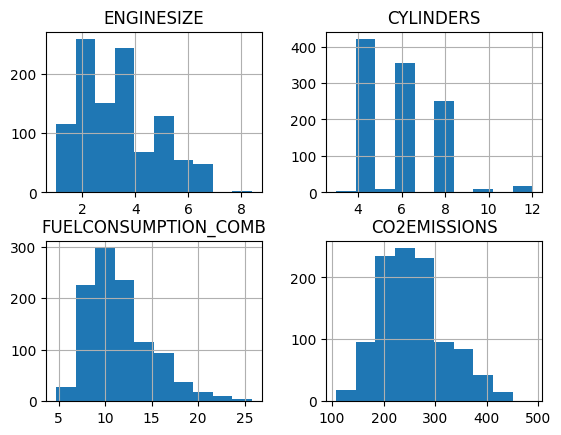

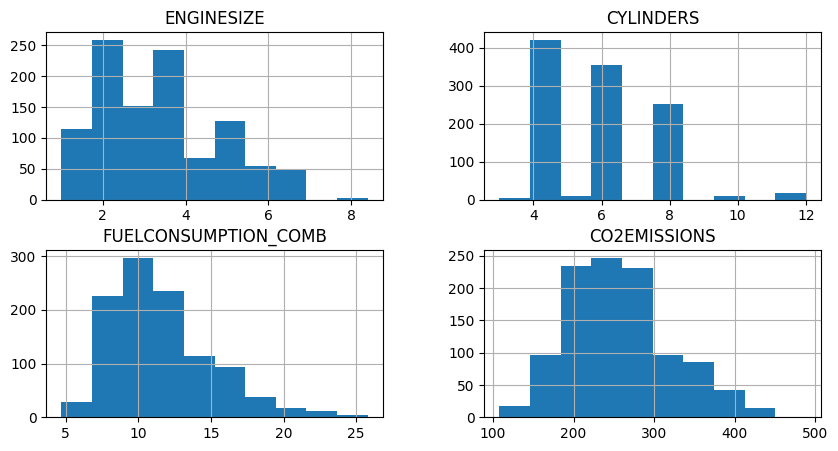

In [ ]:
viz= cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
viz.hist(bins=10,figsize=(10,5))
plt.show()

Scatter plot 

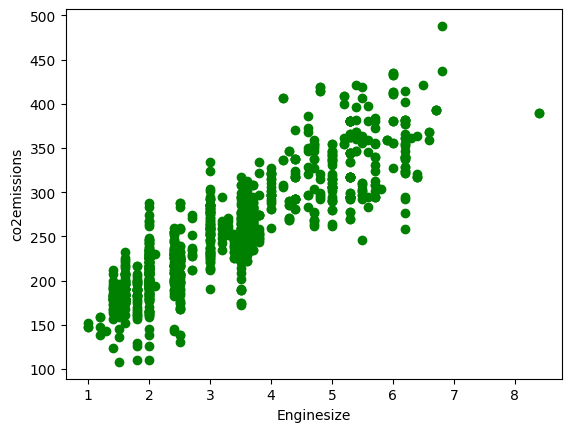

In [ ]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='green')
plt.xlabel('Enginesize')
plt.ylabel('co2emissions')
plt.show()

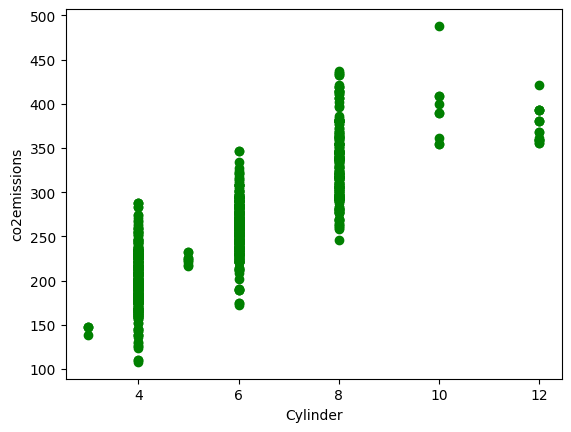

In [ ]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='green')
plt.xlabel('Cylinder')
plt.ylabel('co2emissions')
plt.show()

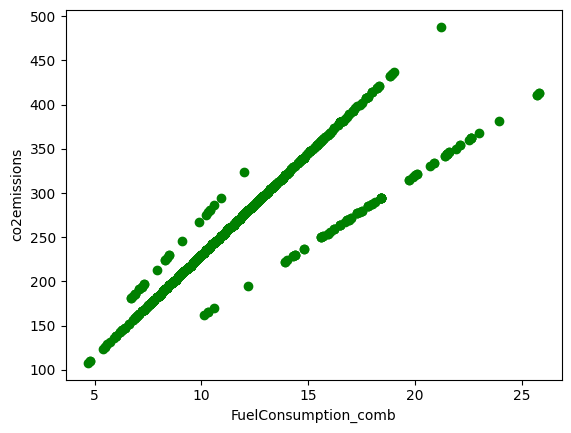

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='green')
plt.xlabel('FuelConsumption_comb')
plt.ylabel('co2emissions')
plt.show()

train_test_dataSplit using np.random.rand() function

In [ ]:
msk= np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]

Train data distribution 

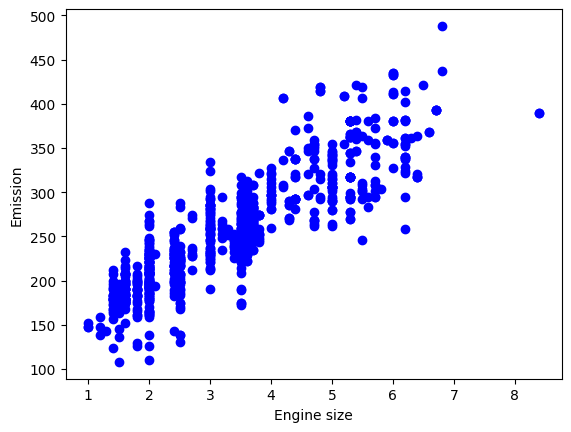

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Linear regression to fit the linear model

Using Sklearn to model data

In [ ]:
from sklearn import linear_model
regr= linear_model.LinearRegression()
train_x=np.asanyarray(train['ENGINESIZE'])
train_y=np.asanyarray(train['CO2EMISSIONS'])
regr.fit(train_x.reshape(-1,1),train_y.reshape(-1,1))

print("Coefficient:",regr.coef_)
print("Intercept:",regr.intercept_)

Coefficient: [[39.57749559]]
Intercept: [124.08084614]


Performance evaluation using metrics 

- Mean Absolute Error

- Mean squared error

- Root mean squared error
  

In [ ]:
from sklearn.metrics import r2_score
test_x= np.asanyarray(test['ENGINESIZE'])
test_y= np.asanyarray(test['CO2EMISSIONS'])
test_y_= regr.predict(test_y.reshape(-1,1))
print("Mean Absolute Error: %.2f"% np.mean(np.absolute(test_y-test_y_)))
print("Mean squared error: %.2f"% np.mean((test_y-test_y_)**2))
print("Root mean squared error: %.2f" % r2_score(test_y,test_y_))

Mean Absolute Error: 9967.77
Mean squared error: 105165211.51
Root mean squared error: -28296.70
